In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk import pos_tag

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
<ipython-input-1-ce844663c9f9>:51: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  from sc

In [2]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [3]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/kingston-mx50.csv',
                          header=None,
                          names=columnNames)

hotelDf['numReviews'] = hotelDf.groupby('hotelName')['reviewColumn'].transform('count')

In [4]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,numReviews
0,data_kingston_50/ca/154992/9160041/885042479.html,Quality Inn &amp; Suites,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",3,negative,"April 6, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
1,data_kingston_50/ca/154992/9160041/869263404.html,Quality Inn &amp; Suites,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",5,positive,"November 21, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
2,data_kingston_50/ca/154992/9160041/857888766.html,Quality Inn &amp; Suites,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",1,negative,"September 1, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
3,data_kingston_50/ca/154992/9160041/886311292.html,Quality Inn &amp; Suites,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",5,positive,"April 15, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
4,data_kingston_50/ca/154992/9160041/901743337.html,Quality Inn &amp; Suites,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",3,negative,"July 9, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14


In [5]:
def get_histogram(df: pd.DataFrame, figsize=(10,5)) -> None:
  plt.figure(figsize=figsize)
  plt.hist(df['ratingScore'], bins=10, edgecolor='black', alpha=0.7)
  plt.xlabel('Ratings')
  plt.ylabel('Frequency')
  plt.title('Distribution of Hotel Ratings')
  plt.grid(axis='y', linestyle='--', alpha=0.6)
  plt.show()

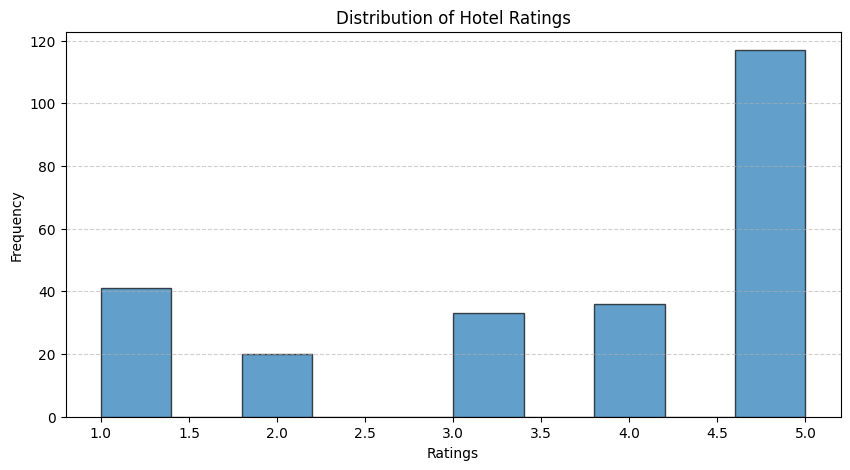

In [6]:
# DO NOT MODIFY THIS CODE
get_histogram(hotelDf)

In [7]:
def plot_time_series(df: pd.DataFrame, figsize=(12, 8)) -> None:
    """
    Plots the number of reviews and rolling average rating score for each hotel over time.
    Creates separate graphs for each hotel.
    """
    # Get the unique hotel names from the 'hotelName' column
    hotels = df['hotelName'].unique()

    # Ensure the 'date_stamp' column is in datetime format
    df['date_stamp'] = pd.to_datetime(df['date_stamp'])

    # Iterate over each unique hotel in the 'hotelName' column
    for hotel in hotels:
        # Filter data for the current hotel
        hotel_data = df[df['hotelName'] == hotel]

        # Create a figure for the current hotel
        fig, ax = plt.subplots(2, 1, figsize=figsize, sharex=True)

        # Plot number of reviews for the current hotel
        review_count = hotel_data.groupby('date_stamp').size()
        ax[0].plot(review_count.index, review_count.values, label=hotel, marker='o')
        ax[0].set_ylabel('Number of Reviews')
        ax[0].set_title(f'Number of Reviews Over Time - {hotel}')

        # Plot rolling average of rating scores for the current hotel
        rolling_avg = hotel_data.groupby('date_stamp')['ratingScore'].mean().rolling(window=5).mean()
        ax[1].plot(rolling_avg.index, rolling_avg.values, label=hotel, marker='x')
        ax[1].set_xlabel('Date')
        ax[1].set_ylabel('Rolling Average Rating Score')
        ax[1].set_title(f'Rolling Average Rating Score Over Time - {hotel}')

        # Add a legend to each subplot
        ax[0].legend()
        ax[1].legend()

        # Adjust the layout to avoid overlap and display the plot
        plt.tight_layout()
        plt.show()

<ipython-input-7-14163a0e420b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_stamp'] = pd.to_datetime(df['date_stamp'])


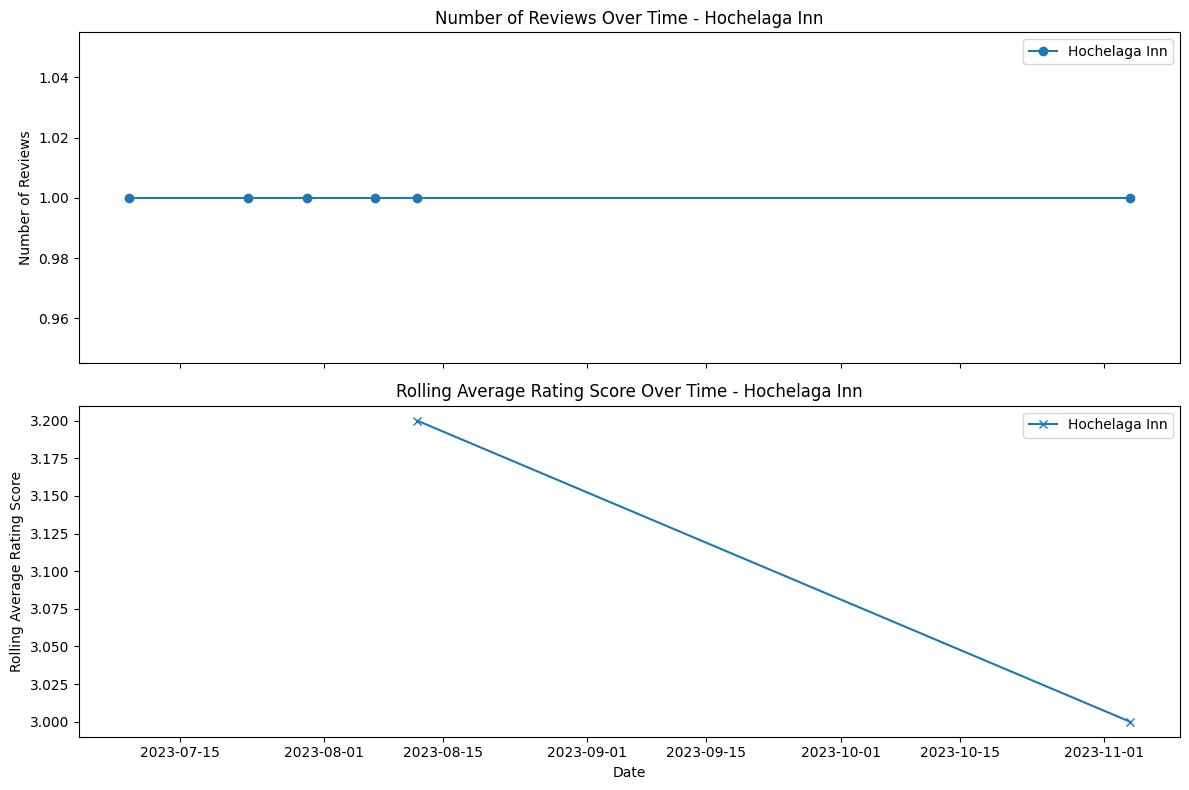

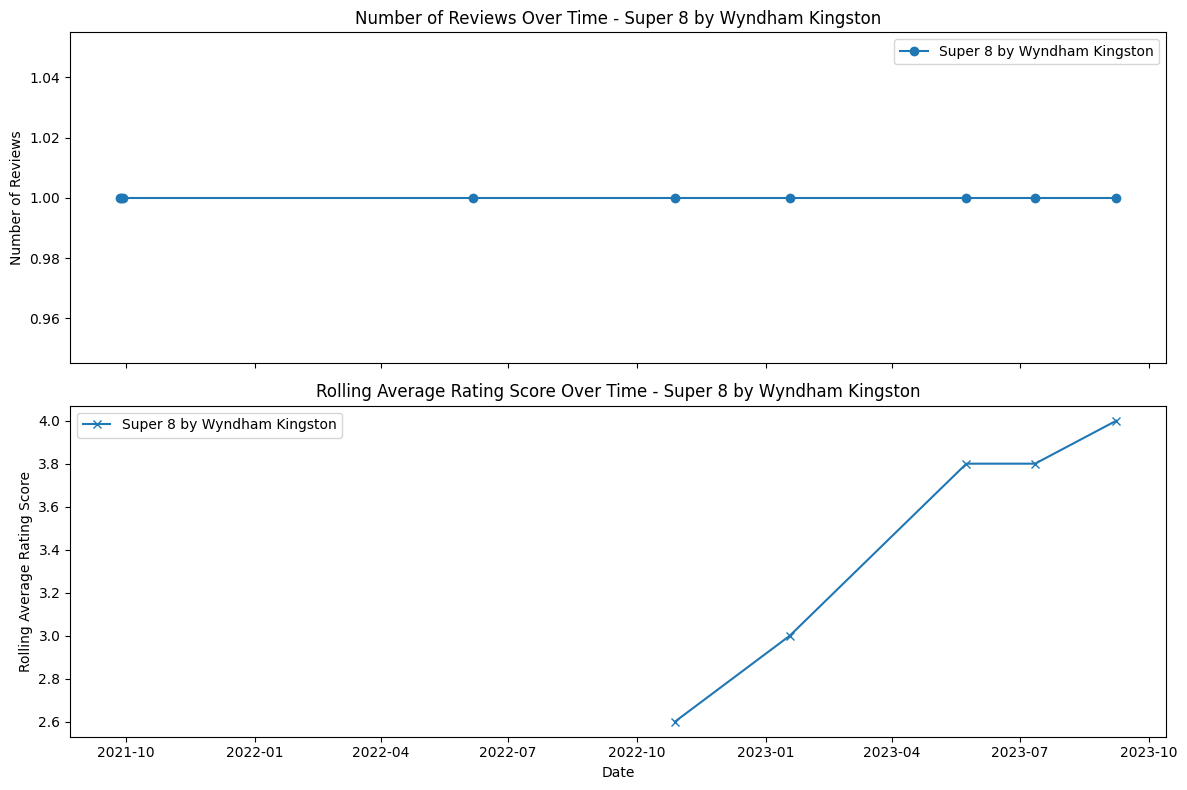

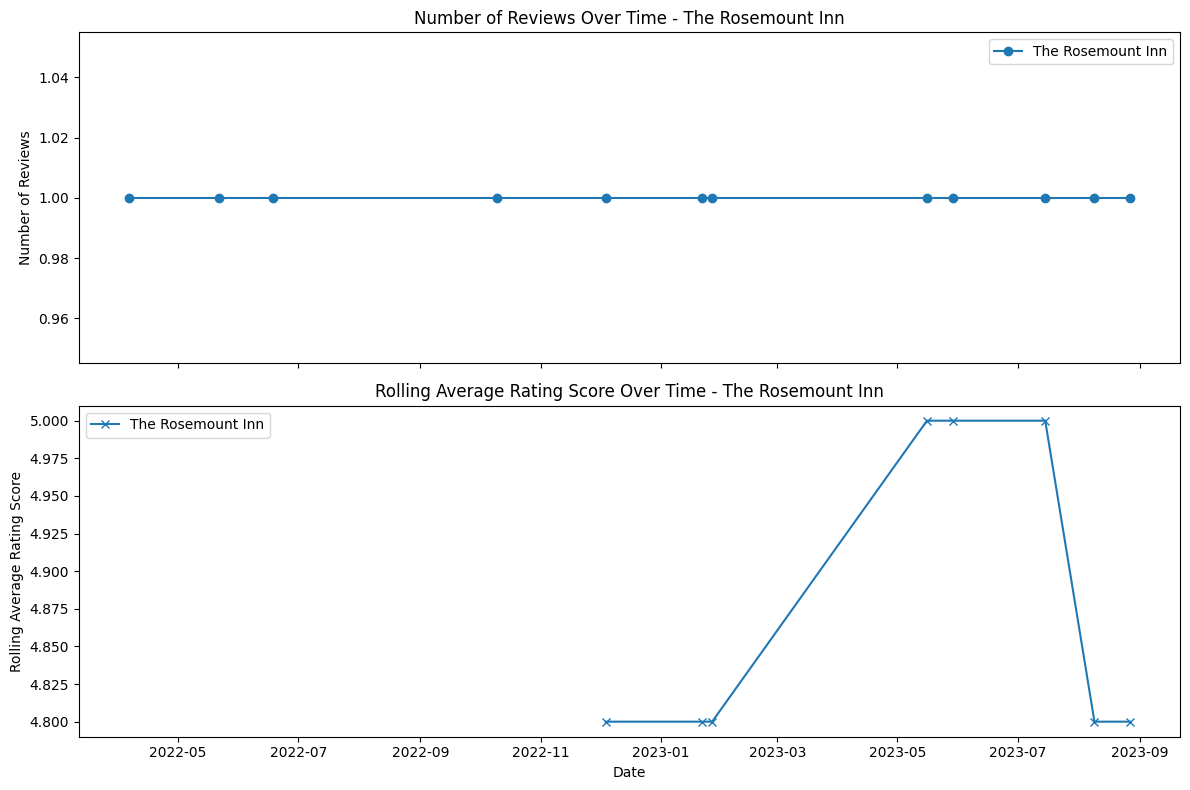

In [8]:
# DO NOT MODIFY THIS CODE
hotelNames = ['Hochelaga Inn', 'Super 8 by Wyndham Kingston', 'The Rosemount Inn']
plot_time_series(hotelDf[hotelDf['hotelName'].isin(hotelNames)])

In [9]:
# DO NOT MODIFY THIS CODE
def get_stop_words():
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
  return stop

def most_frequent_words(df: pd.DataFrame, kwords: int) -> list[tuple[str, int]]:
  stop_words = get_stop_words()
  all_reviews = ' '.join(df['reviewColumn'].dropna())

  # Tokenize the text
  tokens = word_tokenize(all_reviews)
  filtered_tokens = [word.lower() for word in tokens if len(word) > 2 and word.lower() not in stop_words and word.isalpha()]

  # Count the frequency of each word
  word_counts = Counter(filtered_tokens)

  # Get the top k most frequent words
  topk = word_counts.most_common(kwords)
  return topk

In [10]:
# DO NOT MODIFY THIS CODE
topk = most_frequent_words(hotelDf, 500)
topk[:10]

[('clean', 112),
 ('breakfast', 96),
 ('kingston', 87),
 ('great', 80),
 ('one', 80),
 ('good', 79),
 ('friendly', 77),
 ('place', 75),
 ('nice', 75),
 ('would', 74)]

In [11]:
reviews = hotelDf['reviewColumn'].values

freqReview = []
for review in reviews:
    # count tokens in lowercase
    tempCounter = Counter(w.lower() for w in word_tokenize(review))
    # for each word in topk, 1 if present in this review else 0
    indicators = [1 if tempCounter[word] > 0 else 0 for (word, _) in topk]
    freqReview.append(indicators)

freqReviewDf = pd.DataFrame(freqReview)

# name the columns after the words in topk
freqReviewDf.columns = [word for (word, _) in topk]

# join with the hotel name and ground truth
hoteldf_transformed = hotelDf[['hotelName', 'groundTruth']].join(freqReviewDf)

# compute Mutual Information between each word‐column and the label
mi_scores = []
for word, _ in topk:
    mi = metrics.mutual_info_score(hoteldf_transformed['groundTruth'],
                                   hoteldf_transformed[word])
    mi_scores.append([word, mi])

miScoredf = pd.DataFrame(mi_scores, columns=['Word', 'MI Score']) \
              .sort_values('MI Score', ascending=False) \
              .reset_index(drop=True)

# display the top 5 words by MI score
print(miScoredf.head(5))

    Word  MI Score
0  great  0.070770
1  dirty  0.066292
2  clean  0.047330
3  floor  0.041603
4   said  0.040397


## (c)

In [13]:
def calculate_pmi(df, word):
  pmilist=[]
  N = df.shape[0]
  for sentiment in ['positive','negative']:
    for word_present in [False,True]:
        px = sum(df['groundTruth']==sentiment)
        py = sum(df[word]==word_present)
        pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

        if pxy==0:#Log 0 cannot happen
            pmi = math.log((pxy+0.0001)*N/(px*py))
        else:
            pmi = math.log(pxy*N/(px*py))

        pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

  # assemble the results into a dataframe
  pmidf = pd.DataFrame(pmilist)
  pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']

  ## end ##
  return pmidf


In [14]:
# DO NOT MODIFY ANY CODE IN THIS CELL

# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [15]:
grammar = r"""
  NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)



# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [16]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##

  counter = Counter()
  reviews = df['reviewColumn'].values

  for review in reviews:
          counter.update(flatten_phrase_lists([word for word in get_terms(chunker.parse(pos_tag(word_tokenize(review))))]))
  topk = counter.most_common(kNPs)

  ## end ##
  return topk

In [17]:
# Print top 10 most common noun phrases
top10_phrase = getTopKNP(hotelDf,10)
top10_phrase[:10]

[('front desk', 32),
 ('next time', 10),
 ('great locat', 9),
 ('coffe maker', 9),
 ('comfort bed', 8),
 ('air condition', 8),
 ('park lot', 6),
 ('mini fridg', 6),
 ('green acr inn', 6),
 ('great experi', 5)]

In [18]:
grammar = r"""
    NP:
        {<DT>?<JJ|JJS|JJR>*<NN|NNS>+} # ? -> DT is optional, | -> or, * -> any
                                    # number of
"""

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [ ]:
## Your code starts here ##
from collections import Counter
import nltk

def normalize(word, lemmatizer=lemmatizer, stemmer=stemmer):
    """Lowercases, stems, and lemmatizes a word."""
    word = word.lower()
    word = stemmer.stem(word)
    return lemmatizer.lemmatize(word)

def is_acceptable(word, stopword_list=stopword_list):
    """Checks if a word is of acceptable length and not a stop-word."""
    return 2 <= len(word) <= 40 and word.lower() not in stopword_list

def extract_phrases(review):
    """
    Extracts and normalizes multi-word candidate phrases from a single text.
    Returns a list of 'word1 word2 ...' strings.
    """
    tokens = nltk.word_tokenize(review)
    tagged = nltk.pos_tag(tokens)
    tree = chunker.parse(tagged)

    phrases = []
    for subtree in tree.subtrees(filter=lambda t: t.label() in ('NP', 'JJ', 'RB')):
        # Normalize and filter each word in the subtree
        words = [
            normalize(w)
            for w, _ in subtree.leaves()
            if is_acceptable(w)
        ]
        # Only keep multi-word phrases
        if len(words) > 1:
            phrases.append(' '.join(words))
    return phrases

def get_top_k_phrases(df, review_column, k):
    """
    Aggregates candidate phrases across all reviews and returns the top-k most common.
    """
    counter = Counter()
    for review in df[review_column]:
        counter.update(extract_phrases(review))
    return counter.most_common(k)

# Example usage on your hotel reviews DataFrame:
top50_NP = get_top_k_phrases(hotelDf, 'reviewColumn', 50)

def transform_with_top_phrases(df, top_phrases):
    """
    Placeholder for transforming the DataFrame using the top phrases.
    For example, you could add columns indicating the presence or count of each phrase.
    """
    transformed_df = df.copy()
    for phrase, _ in top_phrases:
        transformed_df[f'phrase_{phrase}'] = df['reviewColumn'].str.contains(rf'\b{phrase}\b', case=False).astype(int)
    return transformed_df

# Apply transformation:
df = transform_with_top_phrases(hotelDf, top50_NP)

## end ##